In [ ]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
(X_train, _), (X_test, _) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train.shape[1:]

(28, 28)

In [ ]:
#data should always be of the format “(Number of data points, data point dimension)”. In this case, the training data will be of format 60,000×784.
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
input_img= Input(shape=(784,))

In [ ]:
encoded = Dense(units=32, activation='relu')(input_img)

In [ ]:
decoded = Dense(units=784, activation='sigmoid')(encoded)

In [ ]:
autoencoder=Model(input_img, decoded)

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [ ]:
encoder = Model(input_img, encoded)

In [ ]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2793 - accuracy: 0.0109 - val_loss: 0.1950 - val_accuracy: 0.0133
Epoch 2/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1738 - accuracy: 0.0133 - val_loss: 0.1528 - val_accuracy: 0.0130
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1426 - accuracy: 0.0108 - val_loss: 0.1322 - val_accuracy: 0.0094
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1273 - accuracy: 0.0103 - val_loss: 0.1202 - val_accuracy: 0.0100
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1168 - accuracy: 0.0099 - val_loss: 0.1112 - val_accuracy: 0.0105
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1093 - accuracy: 0.0099 - val_loss: 0.1051 - val_accuracy: 0.0108
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1043 - accuracy: 0.0103 - val_loss: 0.1011 - val_accuracy: 0.0106
Epoch 

In [ ]:
encoded_imgs = encoder.predict(X_test)


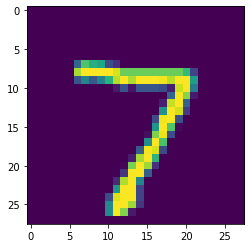

In [ ]:
plt.imshow(X_test[0].reshape(28,28))

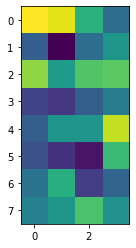

In [ ]:
plt.imshow(encoded_imgs[0].reshape(8,4))

In [ ]:
predicted = autoencoder.predict(X_test)

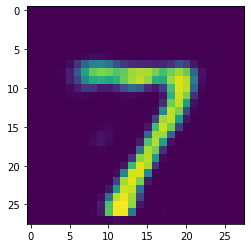

In [ ]:
plt.imshow(predicted[0].reshape(28,28))

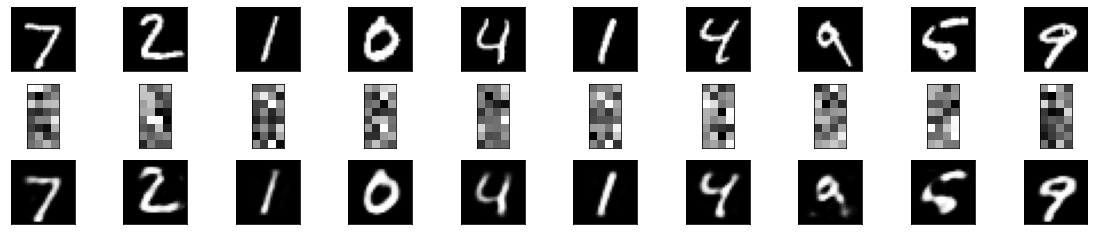

In [ ]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded image
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
    
plt.show()
